<a href="https://colab.research.google.com/github/Fuenfgeld/TeamDataScDatenmanagementUndArchivierung/blob/main/Descriptive_Statistics_Allergy_Patienten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Deskriptive Statistik Allergie Patienten**

Die csv-Dateien sind im Ordner csv_files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
#load csv-file
df = pd.read_csv("/content/drive/MyDrive/csv_files/patient_age_alle.csv") #CSV FILE PATH

In [4]:
#'COLUMN'
mean1 = df['AGE_END'].mean()
max1 = df['AGE_END'].max()
min1 = df['AGE_END'].min()
count1 = df['AGE_END'].count()
median1 = df['AGE_END'].median() 
std1 = df['AGE_END'].std() 
var1 = df['AGE_END'].var() 

In [5]:
print ('Mean age: ' + str(mean1))
print ('Max age: ' + str(max1))
print ('Min age: ' + str(min1))
print ('Median age: ' + str(median1))
print ('Std of age: ' + str(std1))
print ('Var of age: ' + str(var1))

Mean age: 47.8962962962963
Max age: 104
Min age: 0
Median age: 49.0
Std of age: 26.53645031151367
Var of age: 704.183195135434


**Calculate Inter-quartile range**

In [6]:
#Determination of the IQR as important distribution parameter

def get_percentile(df, percentile_rank):
    
    # First, sort by ascending temperature, reset the indices
    df = df.sort_values(by='AGE_END').reset_index()
    
    # Rule of three to get the index of the temperature
    index = (len(df.index)-1) * percentile_rank / 100.0
    index = int(index)
    
    # Return the temperature corresponding to the percentile rank
    return df.at[index, 'AGE_END']

In [7]:
get_percentile(df, 25)

25

In [8]:
get_percentile(df, 75)

69

In [9]:
def interquartile_range(df):
    
    p75 = get_percentile(df, 75)  # 75th percentile
    p25 = get_percentile(df, 25)  # 25th percentile
    iqr = p75 - p25  # Interquartile Range
    return iqr

In [10]:
interquartile_range(df)

44

**Histogram mit Matplotlib**

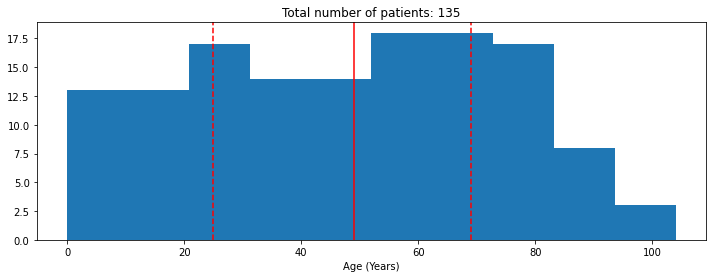

In [11]:
#Plot the 25th percentile, the 50th percentile (median) and the 75th percentile of the data.
plt.figure(figsize=(12,4))
plt.hist(df['AGE_END'])
plt.title("Total number of patients: %s" % len(df.index))
plt.xlabel("Age (Years)")
# Vertical lines for each percentile of interest
plt.axvline(get_percentile(df, 25), linestyle='--', color='red')
plt.axvline(get_percentile(df, 50), linestyle='-',  color='red')
plt.axvline(get_percentile(df, 75), linestyle='--', color='red')
plt.show()